# Dog Breed classification 🐕
This notebook builds a multi-class dog breed image classifier with TensorFlow 2.7 and TensorFlow Hub .12.

## Problem

Determine the breed of a dog from an image.

Customers want a simple alternative for identifying the breed of their dog.

## Data 

The data is a small subset from Kaggle's "Dog Breed Identification": https://www.kaggle.com/c/dog-breed-identification/overview.

There are 3 labeled dog breeds instead of 120 for right now.

## Evaluation 

The evaluation is a file with prediction probablilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## Features

The data has 60 images in the training set and 60 in the test set of about 6 different dog breeds.


# Git

In [51]:
from google.colab import drive
drive.mount('/content/drive')


%cd /content/drive/MyDrive/BreedIdentifier/breedidentifier
%ls -a

!git config --global user.email "madbrow007@gmail.com"
!git config --global user.name {username}

!git add .
!git status
!git commit -m "edited new_labels, started process of turning d"
#!git reset
#!git remote remove origin 
#!git remote add origin 
#!git remote -v
#!git push origin master


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/BreedIdentifier/breedidentifier
BreedIdentifier.ipynb  new_labels.csv             new_test/
.git/                  new_sample_submission.csv  new_train/
On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   BreedIdentifier.ipynb
	modified:   new_labels.csv

no changes added to commit (use "git add" and/or "git commit -a")


# Setting up environment

In [3]:
# TensorFlow 2.7 and TensorFlow Hub import
import tensorflow as tf
import tensorflow_hub as hub

# Transforming the data (images) into tensors

In [46]:
import pandas as pd
#viewing labels

image_labels = pd.read_csv("/content/drive/MyDrive/BreedIdentifier/breedidentifier/new_labels.csv")
print(image_labels.describe())
print(image_labels.head())

                                      id       breed
count                                 60          60
unique                                60           3
top     087b211f15ad8095ba90c0be54c1c30d  great_dane
freq                                   1          20
                                 id              breed
0  087b211f15ad8095ba90c0be54c1c30d         great_dane
1  058ea5b467d08ed978658dc1ad85fb7d        maltese_dog
2  07bbf36ce2c7407751219804b3d187ec  yorkshire_terrier
3  0b86485ef980b0b4999e7ede1f90999e         great_dane
4  022b34fd8734b39995a9f38a4f3e7b6b        maltese_dog


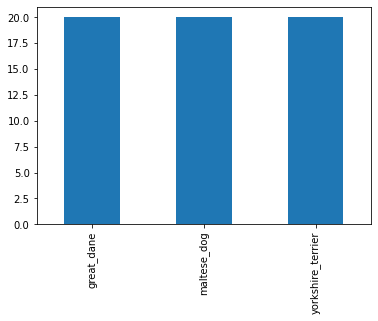

In [8]:
#viewing amount of images per breed on a bar graph
image_labels["breed"].value_counts().plot.bar()

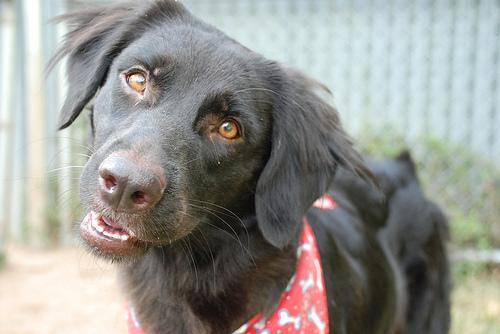

In [47]:
#viewing images

from IPython.display import Image
Image("/content/drive/MyDrive/BreedIdentifier/breedidentifier/new_test/0a342feb5c2100a12bcd15326cf266c6.jpg")



## Listing the images and their labels

In [50]:
import numpy as np
#Filename id list 
image_paths = ["/content/drive/MyDrive/BreedIdentifier/breedidentifier/new_train/" + fname  + ".jpg"  for fname in image_labels["id"]]

#viewing
#image_paths[:5]

labels = image_labels["breed"]
labels = np.array(labels)
#labels

unique_labels = np.unique(labels)
labels[0] == unique_labels

boolean_labels = [label == unique_labels for label in labels]
boolean_labels[:2]

print(labels[1])
print(np.where(unique_labels == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[1].astype(int))

maltese_dog
(array([0]),)
0
[0 1 0]
